In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_excel("C:/Kuliah/Semester 6/Andat/UAS/Data kasus churn UAS Analitika Data 2024.xlsx")


In [67]:
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [23]:
jumlah_churn = data['Exited'].sum()

print(f"Jumlah nasabah yang churn: {jumlah_churn}")

Jumlah nasabah yang churn: 2037


In [24]:
rata_rata_saldo = data['Balance'].mean()

print(f"Rata-rata saldo yang dimiliki nasabah: {rata_rata_saldo:.2f}")

Rata-rata saldo yang dimiliki nasabah: 76485.89


In [14]:
missing_values = data.isnull().sum()
print (missing_values)

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [15]:
duplicates = data.duplicated().sum()
print(duplicates)

0


In [16]:
print(data.dtypes)

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


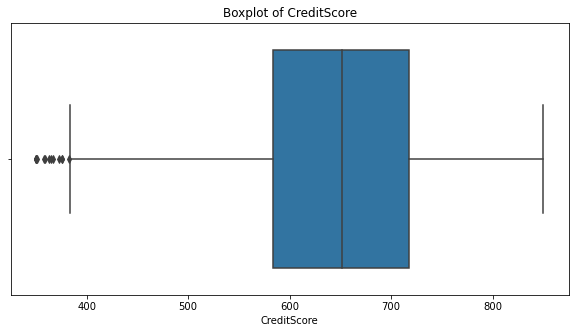

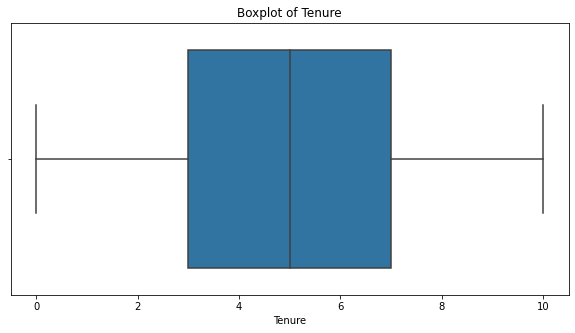

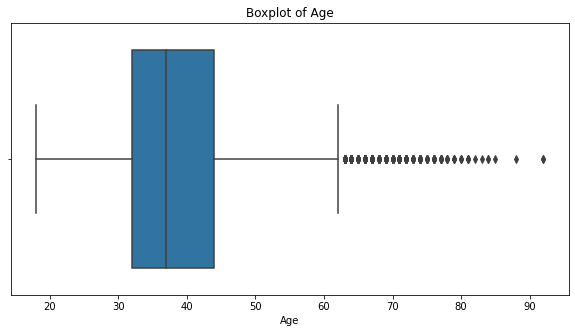

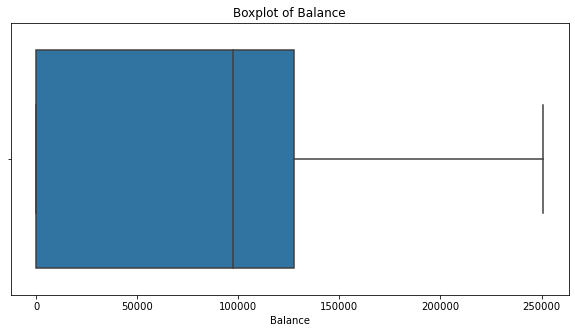

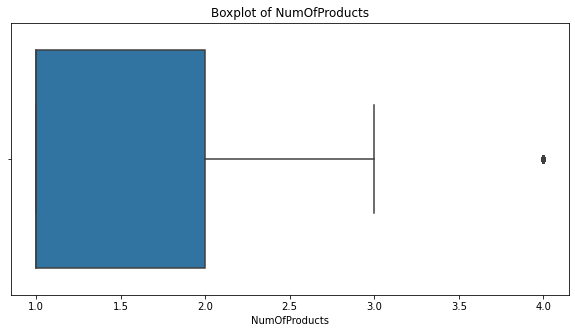

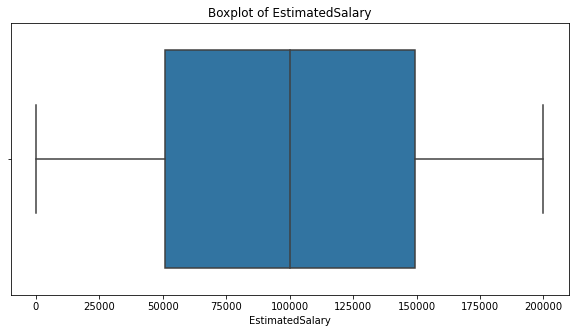

In [58]:
numericcol = ['CreditScore', 'Tenure', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for column in numericcol:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()



In [50]:
nilai_maksimum_Age = data['Age'].max()
nilai_minimum_Age = data['Age'].min()
print(nilai_maksimum_Age)
print(nilai_minimum_Age)

92
18


In [51]:
nilai_maksimum_NumOfProducts = data['NumOfProducts'].max()
nilai_minimum_NumOfProducts = data['NumOfProducts'].min()
print(nilai_maksimum_NumOfProducts)
print(nilai_minimum_NumOfProducts)

4
1


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  \
2967       2968    15595324    Daniels    -0.735507   Germany  Female   
700         701    15803457        Hao     1.024427    France  Female   
3481       3482    15644686    Kennedy     0.808295     Spain  Female   
1621       1622    15777797  Kovalyova     0.396614     Spain    Male   
800         801    15747542      Perez    -0.467915    France    Male   

           Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  \
2967  0.015266  0.008860  0.673160       2.535034          0               0   
700  -0.652609  0.008860 -1.207724       0.804242          1               0   
3481 -0.461788  1.393293 -0.356937       0.804242          1               1   
1621 -0.080145  0.008860 -0.009356      -0.926551          1               1   
800   1.255605  0.701077 -1.207724       0.804242          1               1   

      EstimatedSalary  
2967        -1.640810  
700         -0.079272  
3481    

c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Gender       Female      Male
Geography                    
France     4.950022  5.049401
Germany    4.965633  5.050152
Spain      5.000000  5.057637


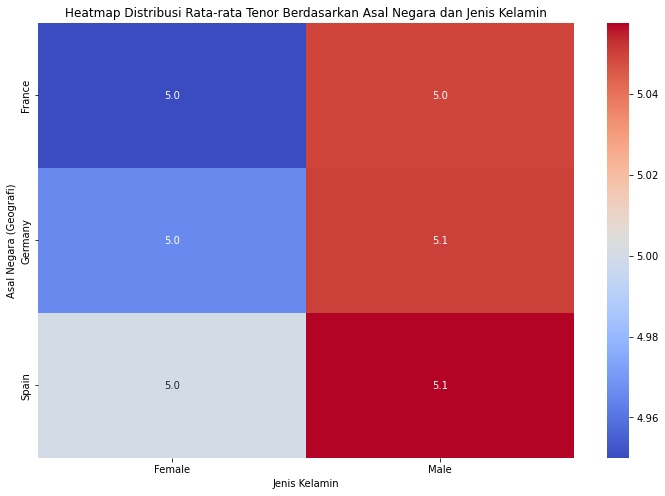

In [18]:
tenure_pivot = pd.pivot_table(data, values='Tenure', index='Geography', columns='Gender', aggfunc='mean')

# Tampilkan pivot table
print(tenure_pivot)

# Buat heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(tenure_pivot, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Heatmap Distribusi Rata-rata Tenor Berdasarkan Asal Negara dan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Asal Negara (Geografi)')
plt.show()


Statistik Deskriptif untuk Credit Score:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


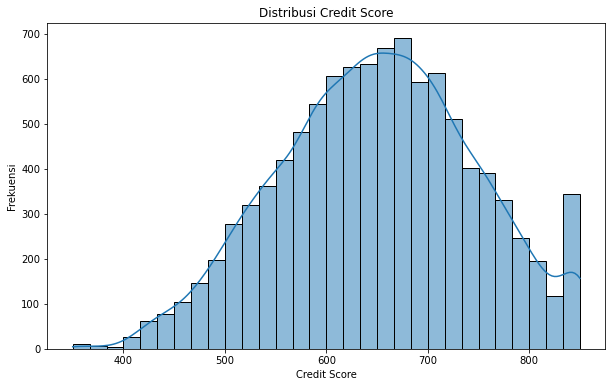

In [3]:
# Analisis univariat untuk setiap variabel

# Variabel numerik: Credit Score
print("\nStatistik Deskriptif untuk Credit Score:")
print(data['CreditScore'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(data['CreditScore'], kde=True, bins=30)
plt.title('Distribusi Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frekuensi')
plt.show()

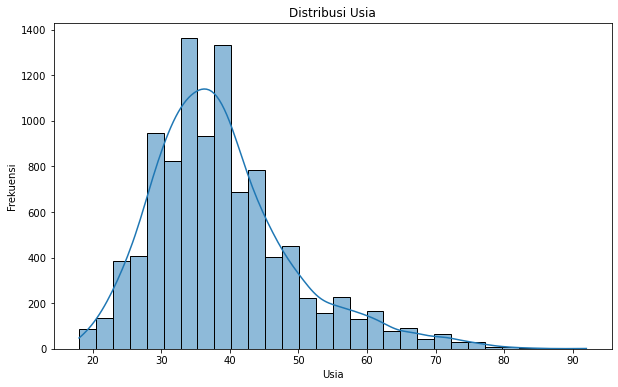

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

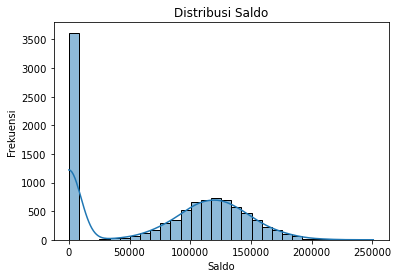

In [7]:
sns.histplot(data['Balance'], kde=True, bins=30)
plt.title('Distribusi Saldo')
plt.xlabel('Saldo')
plt.ylabel('Frekuensi')
plt.show()

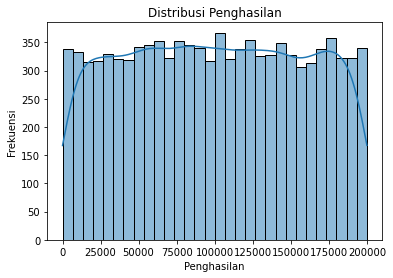

In [9]:
sns.histplot(data['EstimatedSalary'], kde=True, bins=30)
plt.title('Distribusi Penghasilan')
plt.xlabel('Penghasilan')
plt.ylabel('Frekuensi')
plt.show()

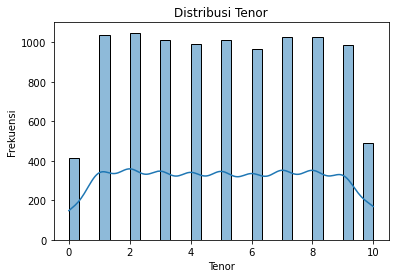

In [11]:
sns.histplot(data['Tenure'], kde=True, bins=30)
plt.title('Distribusi Tenor')
plt.xlabel('Tenor')
plt.ylabel('Frekuensi')
plt.show()

In [3]:
numerical_means = data.mean()

print(numerical_means)

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64


C:\Users\param\AppData\Local\Temp/ipykernel_23168/4020303558.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  numerical_means = data.mean()


Text(0, 0.5, 'Frekuensi')

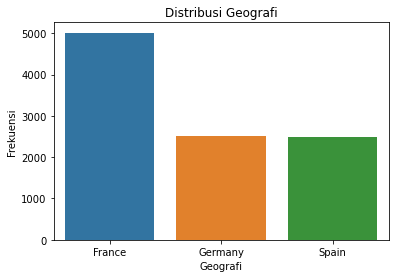

In [12]:
geografi_counts = data['Geography'].value_counts()
sns.countplot(x='Geography', data=data, order=geografi_counts.index)
plt.title('Distribusi Geografi')
plt.xlabel('Geografi')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Frekuensi')

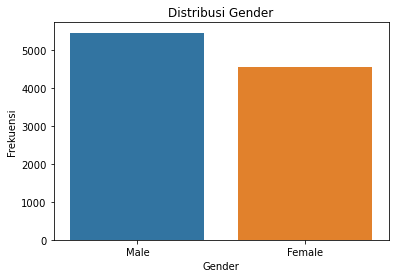

In [14]:
gender_counts = data['Gender'].value_counts()
sns.countplot(x='Gender', data=data, order=gender_counts.index)
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Frekuensi')

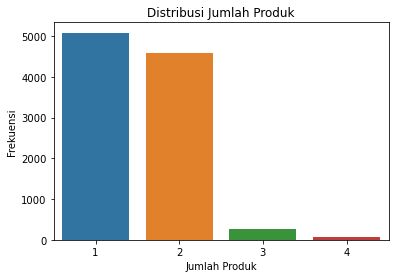

In [15]:
sns.countplot(x='NumOfProducts', data=data)
plt.title('Distribusi Jumlah Produk')
plt.xlabel('Jumlah Produk')
plt.ylabel('Frekuensi')
plt.show()

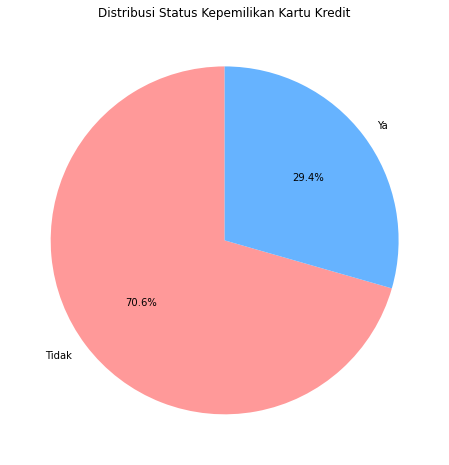

In [35]:
# Tabel frekuensi untuk Status kepemilikan kartu kredit
kartu_kredit_counts = data['HasCrCard'].value_counts()
labels = ['Tidak', 'Ya']

# Membuat pie chart untuk Status kepemilikan kartu kredit
plt.figure(figsize=(8, 8))
plt.pie(kartu_kredit_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribusi Status Kepemilikan Kartu Kredit')
plt.show()

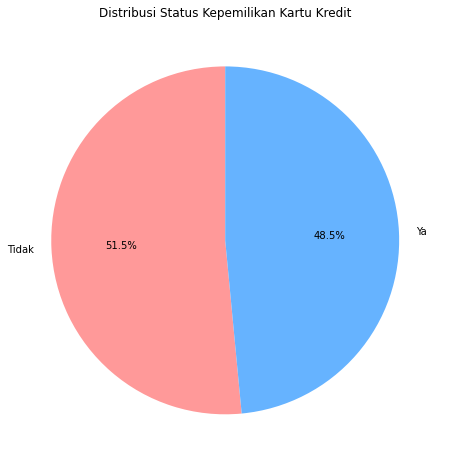

In [36]:
# Tabel frekuensi untuk Status Premium Nasabah
active_member_counts = data['IsActiveMember'].value_counts()
labels = ['Tidak', 'Ya']

# Membuat pie chart untuk Status kepemilikan kartu kredit
plt.figure(figsize=(8, 8))
plt.pie(active_member_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribusi Status Kepemilikan Kartu Kredit')
plt.show()

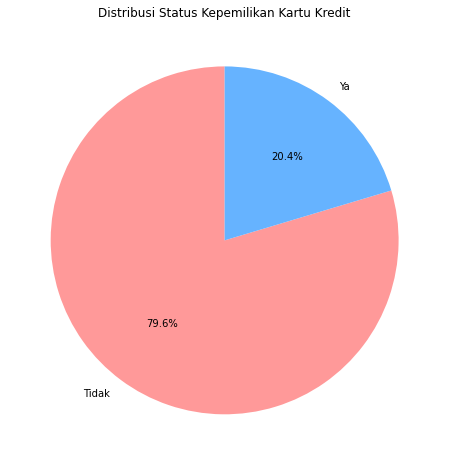

In [37]:
# Tabel frekuensi untuk Status berhenti nasabah
exited_counts = data['Exited'].value_counts()
labels = ['Tidak', 'Ya']

# Membuat pie chart untuk Status kepemilikan kartu kredit
plt.figure(figsize=(8, 8))
plt.pie(exited_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Distribusi Status Kepemilikan Kartu Kredit')
plt.show()

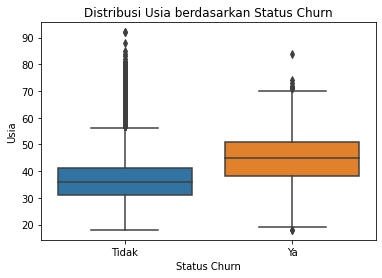

In [38]:
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Distribusi Usia berdasarkan Status Churn')
plt.xlabel('Status Churn')
plt.ylabel('Usia')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

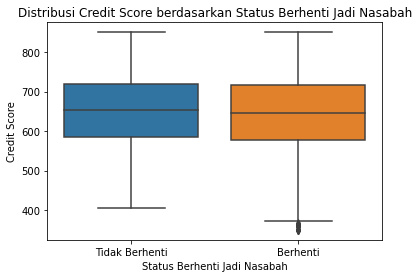

In [39]:
sns.boxplot(x='Exited', y='CreditScore', data=data)
plt.title('Distribusi Credit Score berdasarkan Status Berhenti Jadi Nasabah')
plt.xlabel('Status Berhenti Jadi Nasabah')
plt.ylabel('Credit Score')
plt.xticks([0, 1], ['Tidak Berhenti', 'Berhenti'])
plt.show()

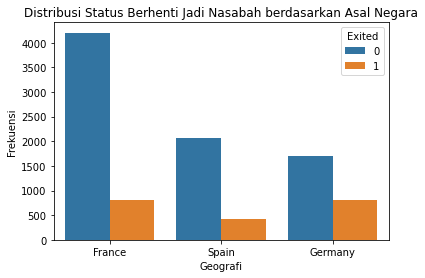

In [41]:
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Distribusi Status Berhenti Jadi Nasabah berdasarkan Asal Negara')
plt.xlabel('Geografi')
plt.ylabel('Frekuensi')
plt.show()

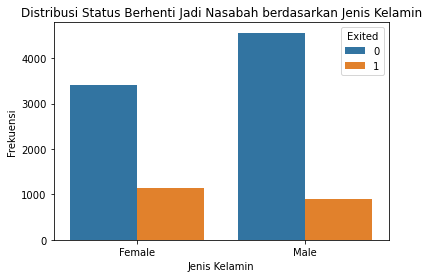

In [42]:
sns.countplot(x='Gender', hue='Exited', data=data)
plt.title('Distribusi Status Berhenti Jadi Nasabah berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Frekuensi')
plt.show()

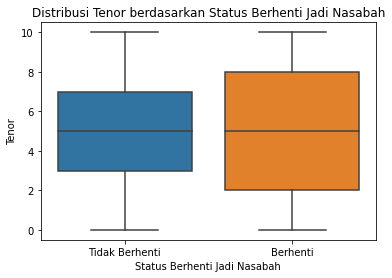

In [43]:
sns.boxplot(x='Exited', y='Tenure', data=data)
plt.title('Distribusi Tenor berdasarkan Status Berhenti Jadi Nasabah')
plt.xlabel('Status Berhenti Jadi Nasabah')
plt.ylabel('Tenor')
plt.xticks([0, 1], ['Tidak Berhenti', 'Berhenti'])
plt.show()

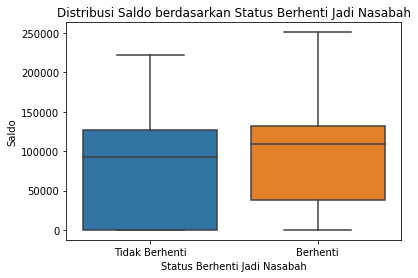

In [44]:
sns.boxplot(x='Exited', y='Balance', data=data)
plt.title('Distribusi Saldo berdasarkan Status Berhenti Jadi Nasabah')
plt.xlabel('Status Berhenti Jadi Nasabah')
plt.ylabel('Saldo')
plt.xticks([0, 1], ['Tidak Berhenti', 'Berhenti'])
plt.show()

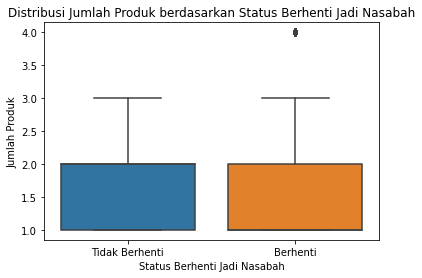

In [45]:
sns.boxplot(x='Exited', y='NumOfProducts', data=data)
plt.title('Distribusi Jumlah Produk berdasarkan Status Berhenti Jadi Nasabah')
plt.xlabel('Status Berhenti Jadi Nasabah')
plt.ylabel('Jumlah Produk')
plt.xticks([0, 1], ['Tidak Berhenti', 'Berhenti'])
plt.show()

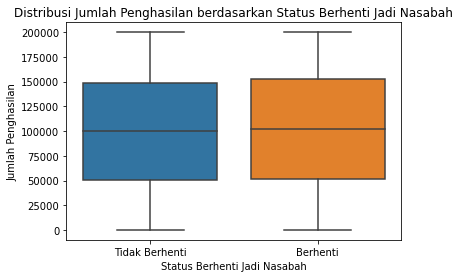

In [46]:
sns.boxplot(x='Exited', y='EstimatedSalary', data=data)
plt.title('Distribusi Jumlah Penghasilan berdasarkan Status Berhenti Jadi Nasabah')
plt.xlabel('Status Berhenti Jadi Nasabah')
plt.ylabel('Jumlah Penghasilan')
plt.xticks([0, 1], ['Tidak Berhenti', 'Berhenti'])
plt.show()

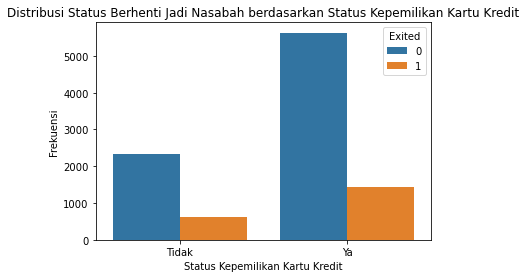

In [48]:
sns.countplot(x='HasCrCard', hue='Exited', data=data)
plt.title('Distribusi Status Berhenti Jadi Nasabah berdasarkan Status Kepemilikan Kartu Kredit')
plt.xlabel('Status Kepemilikan Kartu Kredit')
plt.ylabel('Frekuensi')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

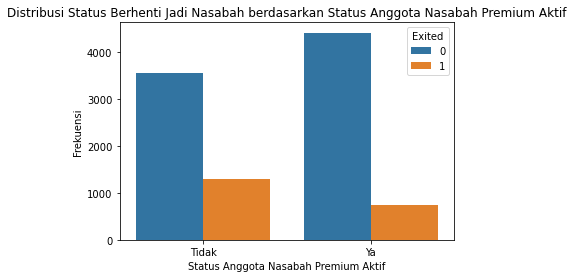

In [49]:
sns.countplot(x='IsActiveMember', hue='Exited', data=data)
plt.title('Distribusi Status Berhenti Jadi Nasabah berdasarkan Status Anggota Nasabah Premium Aktif')
plt.xlabel('Status Anggota Nasabah Premium Aktif')
plt.ylabel('Frekuensi')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.show()

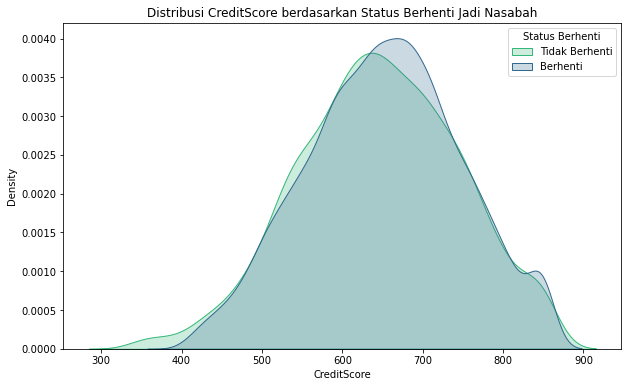

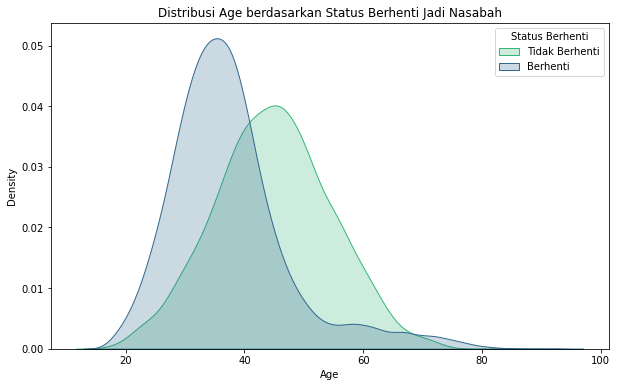

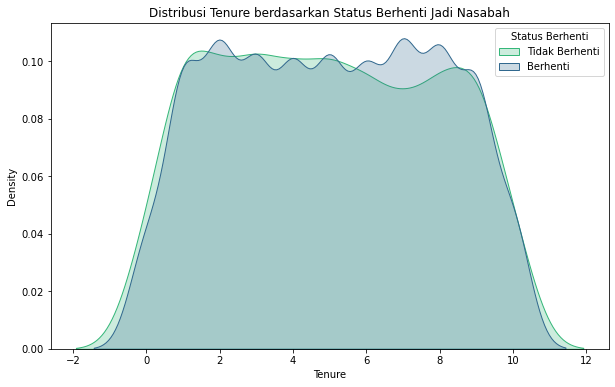

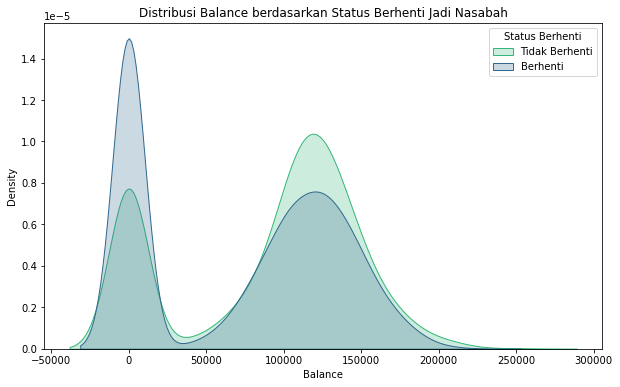

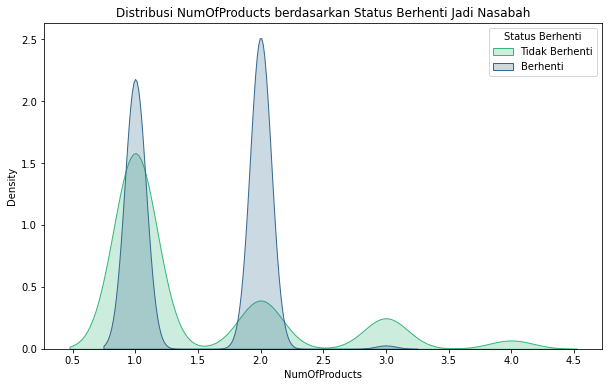

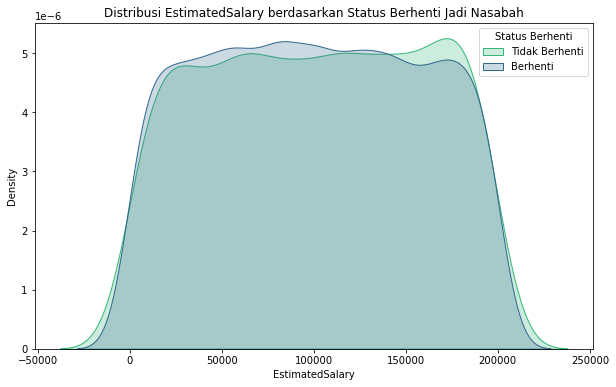

In [56]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=data_encoded, x=feature, hue='Exited', fill=True, common_norm=False, palette='viridis')
    plt.title(f'Distribusi {feature} berdasarkan Status Berhenti Jadi Nasabah')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend(title='Status Berhenti', labels=['Tidak Berhenti', 'Berhenti'])
    plt.show()

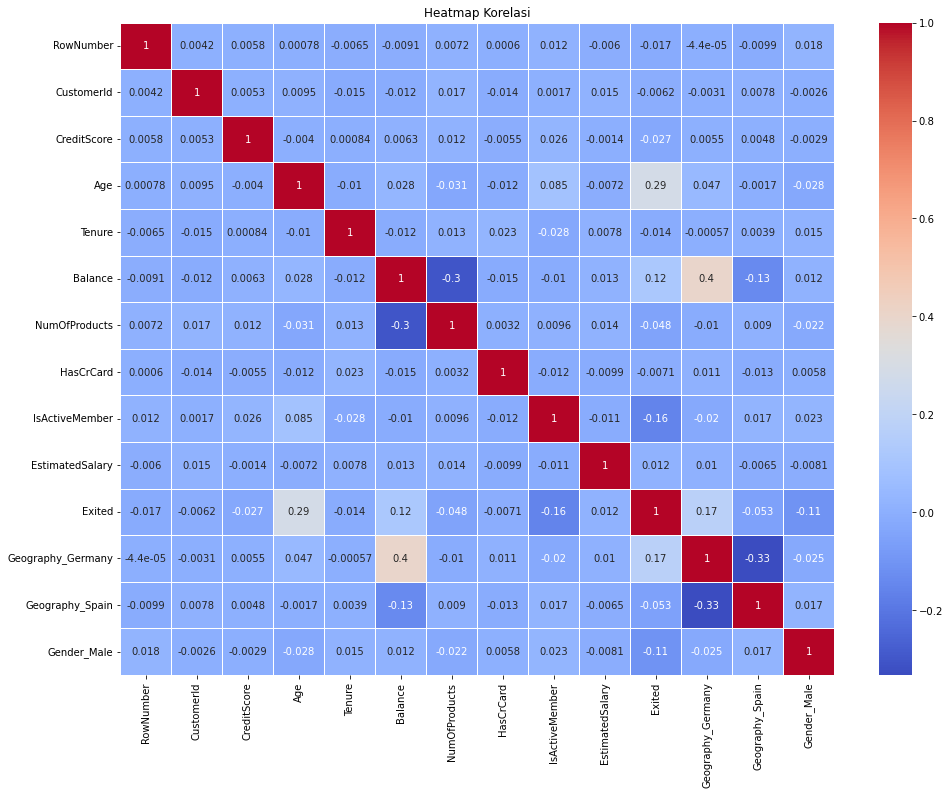

In [55]:


# Membuat heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

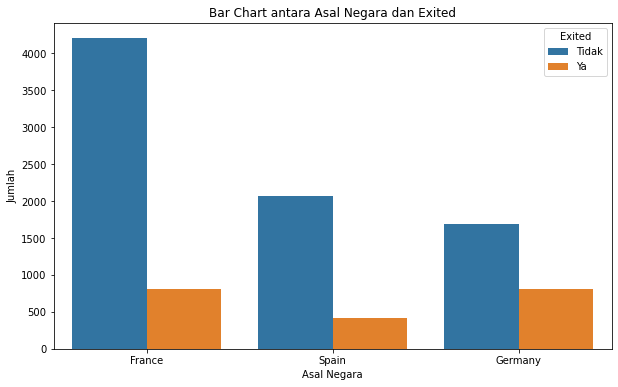

In [28]:
# Bar chart antara Exited dan variabel kategorikal lainnya
plt.figure(figsize=(10, 6))
sns.countplot(x='Geography', hue='Exited', data=data)
plt.title('Bar Chart antara Asal Negara dan Exited')
plt.xlabel('Asal Negara')
plt.ylabel('Jumlah')
plt.legend(title='Status Berhenti', labels=['Tidak', 'Ya'])
plt.show()

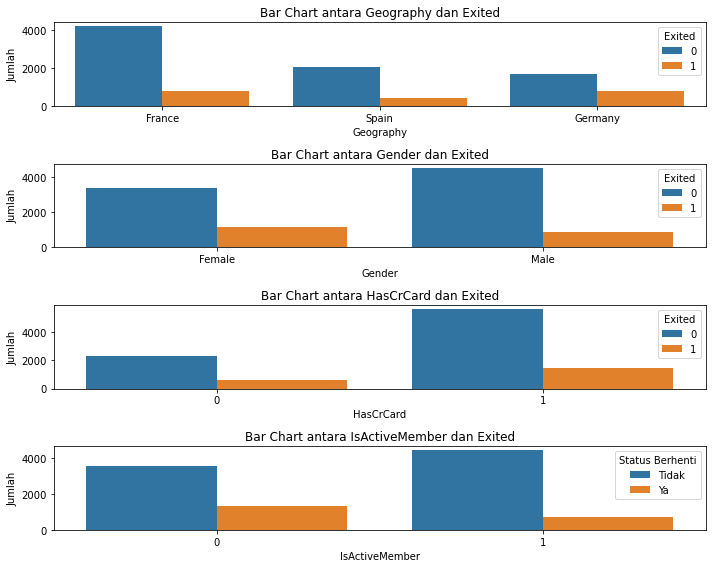

In [31]:
categorical_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

# Menyiapkan subplot untuk plot
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=1, figsize=(10, 8))

# Membuat bar chart untuk setiap variabel kategorikal
for i, var in enumerate(categorical_vars):
    sns.countplot(x=var, hue='Exited', data=data, ax=axes[i])
    axes[i].set_title(f'Bar Chart antara {var} dan Exited')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Jumlah')
    plt.legend(title='Status Berhenti', labels=['Tidak', 'Ya'])

# Menyesuaikan layout
plt.tight_layout()
plt.show()

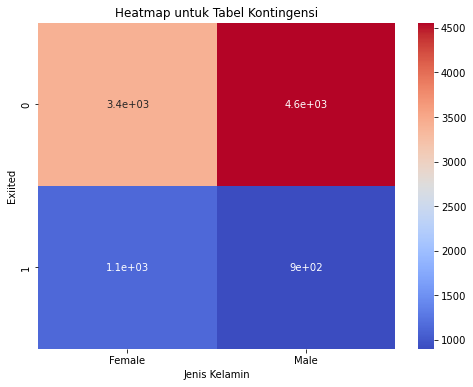

In [36]:
# Menghitung tabel kontingensi antara variabel kategorikal
contingency_table = pd.crosstab(data['Exited'], data['Gender'])

# Plot heatmap untuk tabel kontingensi
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm')
plt.title('Heatmap untuk Tabel Kontingensi')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Exiited')
plt.show()

In [39]:
df = pd.DataFrame(data)

# Melakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Menampilkan hasil encoding
print(df_encoded.head())

   RowNumber  CustomerId   Surname  CreditScore  Age  Tenure    Balance  \
0          1    15634602  Hargrave          619   42       2       0.00   
1          2    15647311      Hill          608   41       1   83807.86   
2          3    15619304      Onio          502   42       8  159660.80   
3          4    15701354      Boni          699   39       1       0.00   
4          5    15737888  Mitchell          850   43       2  125510.82   

   NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  \
0              1          1               1        101348.88       1   
1              1          0               1        112542.58       0   
2              3          1               0        113931.57       1   
3              2          0               0         93826.63       0   
4              1          1               1         79084.10       0   

   Geography_France  Geography_Germany  Geography_Spain  Gender_Female  \
0                 1                  0    

In [10]:
from sklearn.model_selection import train_test_split

# Pisahkan variabel dependen dengan independen
X = data.drop('Exited', axis=1)
y = data['Exited']

#Training set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
print(X_train)


      RowNumber  CustomerId           Surname  CreditScore Geography  Gender  \
2967       2968    15595324           Daniels          579   Germany  Female   
700         701    15803457               Hao          750    France  Female   
3481       3482    15644686           Kennedy          729     Spain  Female   
1621       1622    15777797         Kovalyova          689     Spain    Male   
800         801    15747542             Perez          605    France    Male   
...         ...         ...               ...          ...       ...     ...   
9225       9226    15584928  Ugochukwutubelum          594   Germany  Female   
4859       4860    15647111             White          794     Spain  Female   
3264       3265    15574372            Hoolan          738    France    Male   
9845       9846    15664035           Parsons          590     Spain  Female   
2732       2733    15592816          Udokamma          623   Germany  Female   

      Age  Tenure    Balance  NumOfProd

In [61]:
# 4. Menampilkan Jumlah Nasabah Churn dan Tidak Churn
print("Jumlah nasabah dalam set pelatihan (training set):")
print(y_train.value_counts())
print("\nJumlah nasabah dalam set pengujian (testing set):")
print(y_test.value_counts())

Jumlah nasabah dalam set pelatihan (training set):
0    5972
1    1528
Name: Exited, dtype: int64

Jumlah nasabah dalam set pengujian (testing set):
0    1991
1     509
Name: Exited, dtype: int64


In [20]:
pip install scikit-learn




SyntaxError: invalid syntax (Temp/ipykernel_23168/182657945.py, line 1)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best hyperparameters found by GridSearchCV:
{'classifier__bootstrap': True, 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Confusion Matrix:
[[1940   63]
 [ 292  205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2003
           1       0.76      0.41      0.54       497

    accuracy                           0.86      2500
   macro avg       0.82      0.69      0.73      2500
weighted avg       0.85      0.86      0.84      2500

Accuracy: 0.858
0.8540187706368012


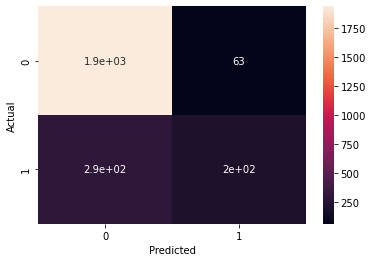

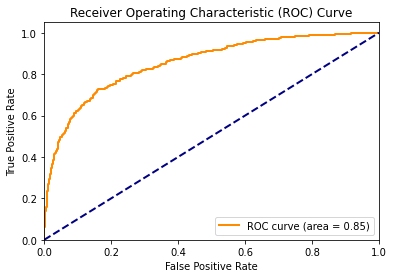

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier



# Memisahkan fitur dan target
X = data.drop(['CustomerId', 'Surname', 'Exited'], axis=1)
y = data['Exited']

# Mengidentifikasi kolom numerik dan kategorikal
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Membuat preprocessor untuk menghandle kolom numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membangun pipeline dengan preprocessor dan model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

# Mendefinisikan parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Menggunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameters
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameters terbaik
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Membuat prediksi dengan model terbaik
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluasi Model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC Curve
y_prob = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

#Membuat confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\param\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.8112     0.81173333 0.8112            nan        nan        nan
 0.8116            nan 0.8116     0.8112     0.81173333 0.8112
        nan        nan        nan 0.8116            nan 0.8116
 0.8112     0.81173333 0.8112            nan        nan        nan
 0.8116            nan 0.8116     0.81146667 0.8116     0.81146667
        nan        nan        nan 0.8116            nan 0.8116
 0.81146667 0.8116     0.81146667        nan        nan        nan
 0.8116            nan 0.8116     0.81146667 0.8116     0.81146667
        nan        nan        nan 0.8116            nan 0.8116
 0.81146667 0.8116     0.81146667        nan        nan        nan
 0.8116            nan 0.8116     0.81146667 0.8116     0.81146667
        nan        nan        nan 0.8116            nan 0.8116
 0.81146667 0.8116     0.81146667        nan        nan        nan
 0.811

Best hyperparameters found by GridSearchCV:
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2003
           1       0.55      0.19      0.28       497

    accuracy                           0.81      2500
   macro avg       0.69      0.58      0.59      2500
weighted avg       0.77      0.81      0.77      2500

Accuracy: 0.808
0.7742410529075601


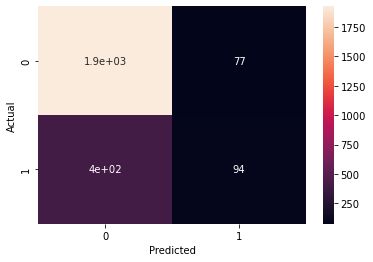

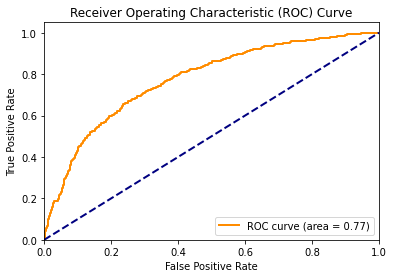

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Mengubah data kategorikal menjadi numerik menggunakan one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Memisahkan fitur dan target
X = data_encoded.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data_encoded['Exited']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Mengidentifikasi kolom numerik dan kategorikal
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
categorical_features = ['Geography', 'Gender']

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



# Membuat preprocessor untuk menghandle kolom numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Mendefinisikan parameter grid
param_grid = {
    'penalty': ['l2', 'elasticnet', 'none'],
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Membuat model LogisticRegression
lr = LogisticRegression()

# Menggunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameters
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameters terbaik
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Membuat model dengan hyperparameters terbaik
best_lr = grid_search.best_estimator_

# Melatih model
best_lr.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Membuat prediksi dengan model terbaik
y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

# Confusion Matrix
#Membuat confusion matrix
confusion_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters found by GridSearchCV:
{'alpha': 0.01}
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      2003
           1       0.52      0.06      0.10       497

    accuracy                           0.80      2500
   macro avg       0.66      0.52      0.50      2500
weighted avg       0.75      0.80      0.73      2500

Accuracy: 0.802
0.7777900553596165


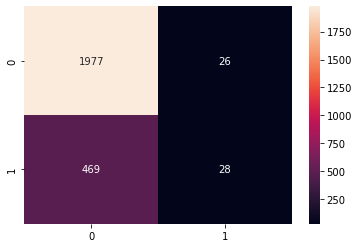

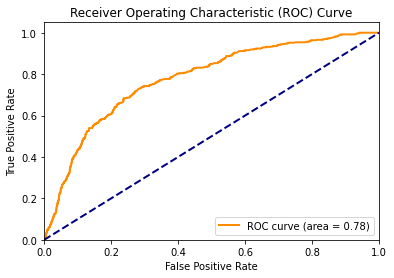

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn


# Mengubah data kategorikal menjadi numerik menggunakan one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Memisahkan fitur dan target
X = data_encoded.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data_encoded['Exited']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Standarisasi fitur numerik
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Mendefinisikan parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Membuat model Lasso
lasso = Lasso()

# Menggunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameters
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameters terbaik
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Membuat model dengan hyperparameters terbaik
best_lasso = grid_search.best_estimator_

# Melatih model
best_lasso.fit(X_train, y_train)

# Membuat prediksi dengan model terbaik
y_pred = best_lasso.predict(X_test)
y_pred_class = [1 if i >= 0.5 else 0 for i in y_pred]

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)
sn.heatmap(conf_matrix, annot=True, fmt='d')

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_class))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
print(roc_auc)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [11]:
pip install xgboost --user


  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)



c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\param\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters found by GridSearchCV:
{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 50, 'subsample': 0.9}
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.77      0.48      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.76      2500
weighted avg       0.86      0.87      0.86      2500

Accuracy: 0.8684
0.8694041432820588


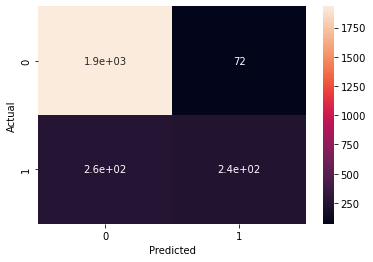

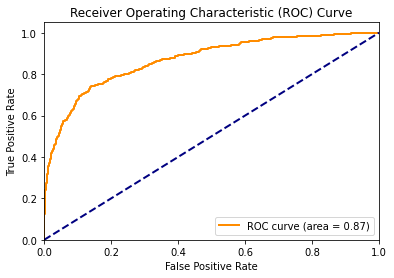

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sn

# Mengubah data kategorikal menjadi numerik menggunakan one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Memisahkan fitur dan target
X = data_encoded.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = data_encoded['Exited']

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Standarisasi fitur numerik
scaler = StandardScaler()
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Mendefinisikan parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Membuat model XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Menggunakan GridSearchCV untuk mencari kombinasi terbaik dari hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameters terbaik
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)

# Membuat model dengan hyperparameters terbaik
best_xgb = grid_search.best_estimator_

# Melatih model
best_xgb.fit(X_train, y_train)

# Membuat prediksi dengan model terbaik
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

# Confusion Matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
print(roc_auc)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
